In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

plt.style.available
plt.style.use('default')

In [20]:
# Los Alamos death quantile projections
# https://covid-19.bsvgateway.org
death_quantiles = pd.read_csv("2020-07-01_deaths_quantiles_us_website.csv", parse_dates = ['dates'], index_col = 'dates')
death_quantiles[-2:]

,simple_state,q.01,q.025,q.05,q.10,q.15,q.20,q.25,q.30,q.35,...,q.80,q.85,q.90,q.95,q.975,q.99,obs,state,truth_deaths,fcst_date
dates,,,,,,,,,,,,,,,,,,,,,
2020-08-18,wisconsin,848.001526,860.893905,877.426921,901.278963,919.223931,933.463518,952.040715,967.112976,984.224366,...,1193.607831,1240.101024,1337.949667,1452.899954,1608.581205,1791.935130,0,Wisconsin,NaN,2020-07-01
2020-08-18,wyoming,21.417721,21.877313,22.508896,23.471003,24.341261,25.095358,25.722188,26.540921,27.267738,...,39.320983,43.063822,48.014497,55.877874,65.282317,78.475848,0,Wyoming,NaN,2020-07-01


simple_state,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,districtofcolumbia,florida,...,tennessee,texas,utah,vermont,virginia,virginislands,washington,westvirginia,wisconsin,wyoming
dates,,,,,,,,,,,,,,,,,,,,,
2020-08-17,1397.788799,24.588785,4607.322643,426.742367,9070.863199,1899.161256,4579.365364,601.784808,601.246509,5202.869065,...,1214.120126,5021.613400,250.830676,56.682465,2116.981008,9.907196,1611.414285,118.657764,1035.057393,29.790008
2020-08-18,1403.838223,24.724381,4671.129569,428.144159,9102.523808,1900.639812,4582.804627,603.001590,601.673537,5230.991839,...,1224.465511,5064.558922,251.711600,56.686994,2122.139858,9.943262,1614.404191,119.082052,1037.333599,29.873357


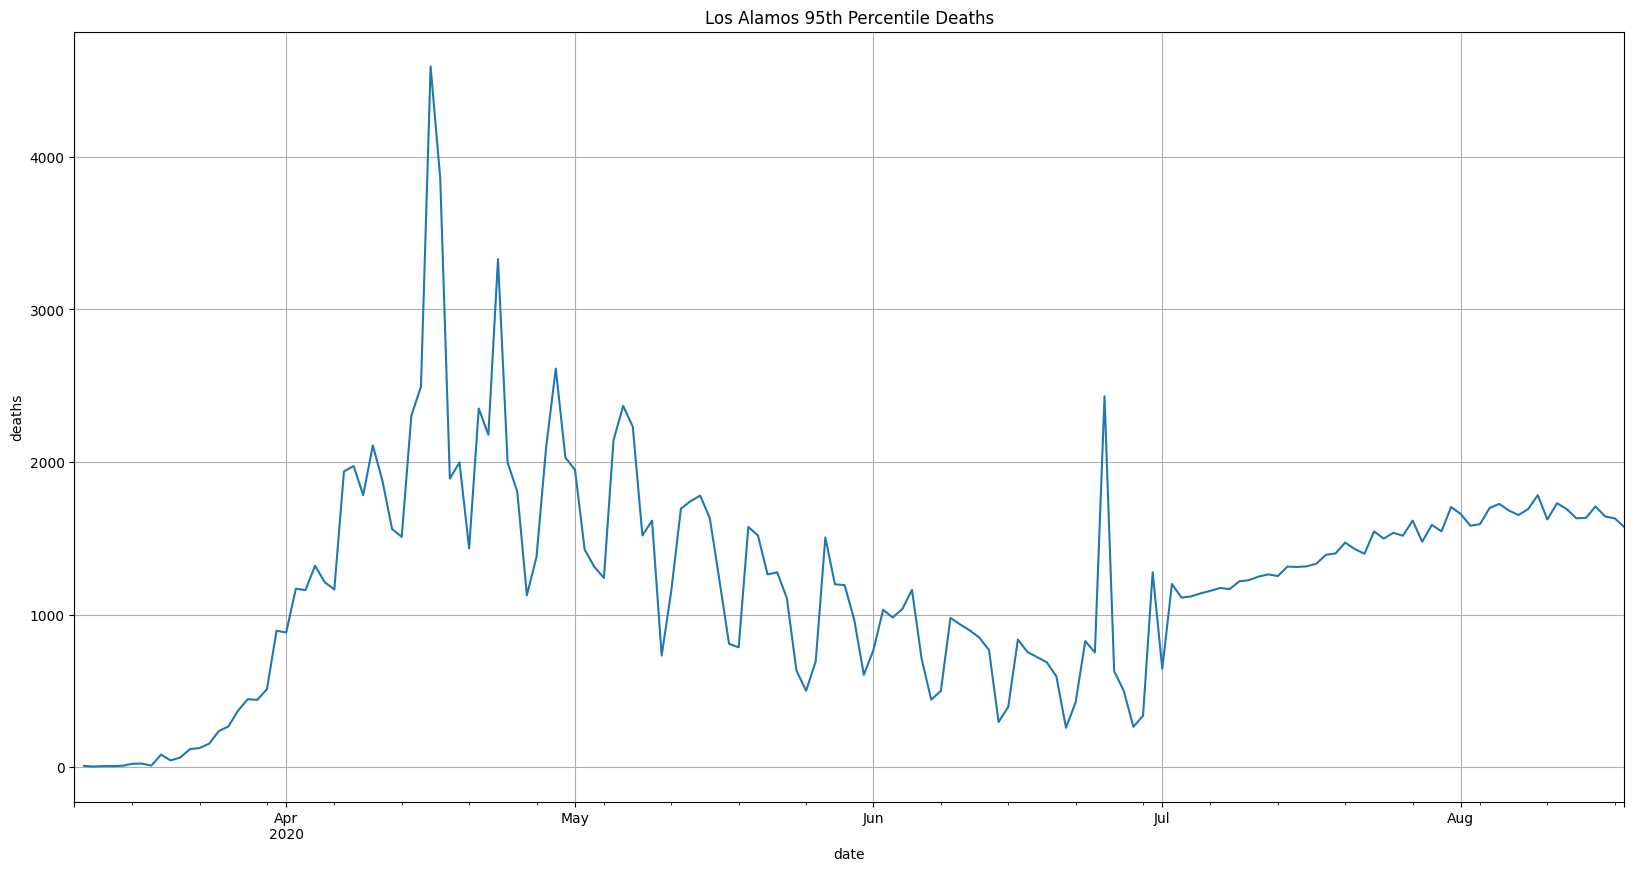

In [17]:
deaths_per_state = pd.pivot_table(death_quantiles, index='dates', values=['q.05', 'q.50', 'q.95'], columns='simple_state', aggfunc=np.sum)

ax = deaths_per_state['q.95'].sum(axis=1).diff().plot(
    title="Los Alamos 95th Percentile Deaths",
    figsize=(20,10),
    grid=True,
)

ax.set_xlabel("date")
ax.set_ylabel("deaths")

deaths_per_state['q.50'][-2:]

In [26]:
# Los Alamos death quantile projections
# https://covid-19.bsvgateway.org
death_quantiles_07_08 = pd.read_csv("2020-07-08_deaths_quantiles_us_website.csv", parse_dates = ['dates'], index_col = 'dates')
death_quantiles[-2:]

,simple_state,q.01,q.025,q.05,q.10,q.15,q.20,q.25,q.30,q.35,...,q.80,q.85,q.90,q.95,q.975,q.99,obs,state,truth_deaths,fcst_date
dates,,,,,,,,,,,,,,,,,,,,,
2020-08-18,wisconsin,848.001526,860.893905,877.426921,901.278963,919.223931,933.463518,952.040715,967.112976,984.224366,...,1193.607831,1240.101024,1337.949667,1452.899954,1608.581205,1791.935130,0,Wisconsin,NaN,2020-07-01
2020-08-18,wyoming,21.417721,21.877313,22.508896,23.471003,24.341261,25.095358,25.722188,26.540921,27.267738,...,39.320983,43.063822,48.014497,55.877874,65.282317,78.475848,0,Wyoming,NaN,2020-07-01


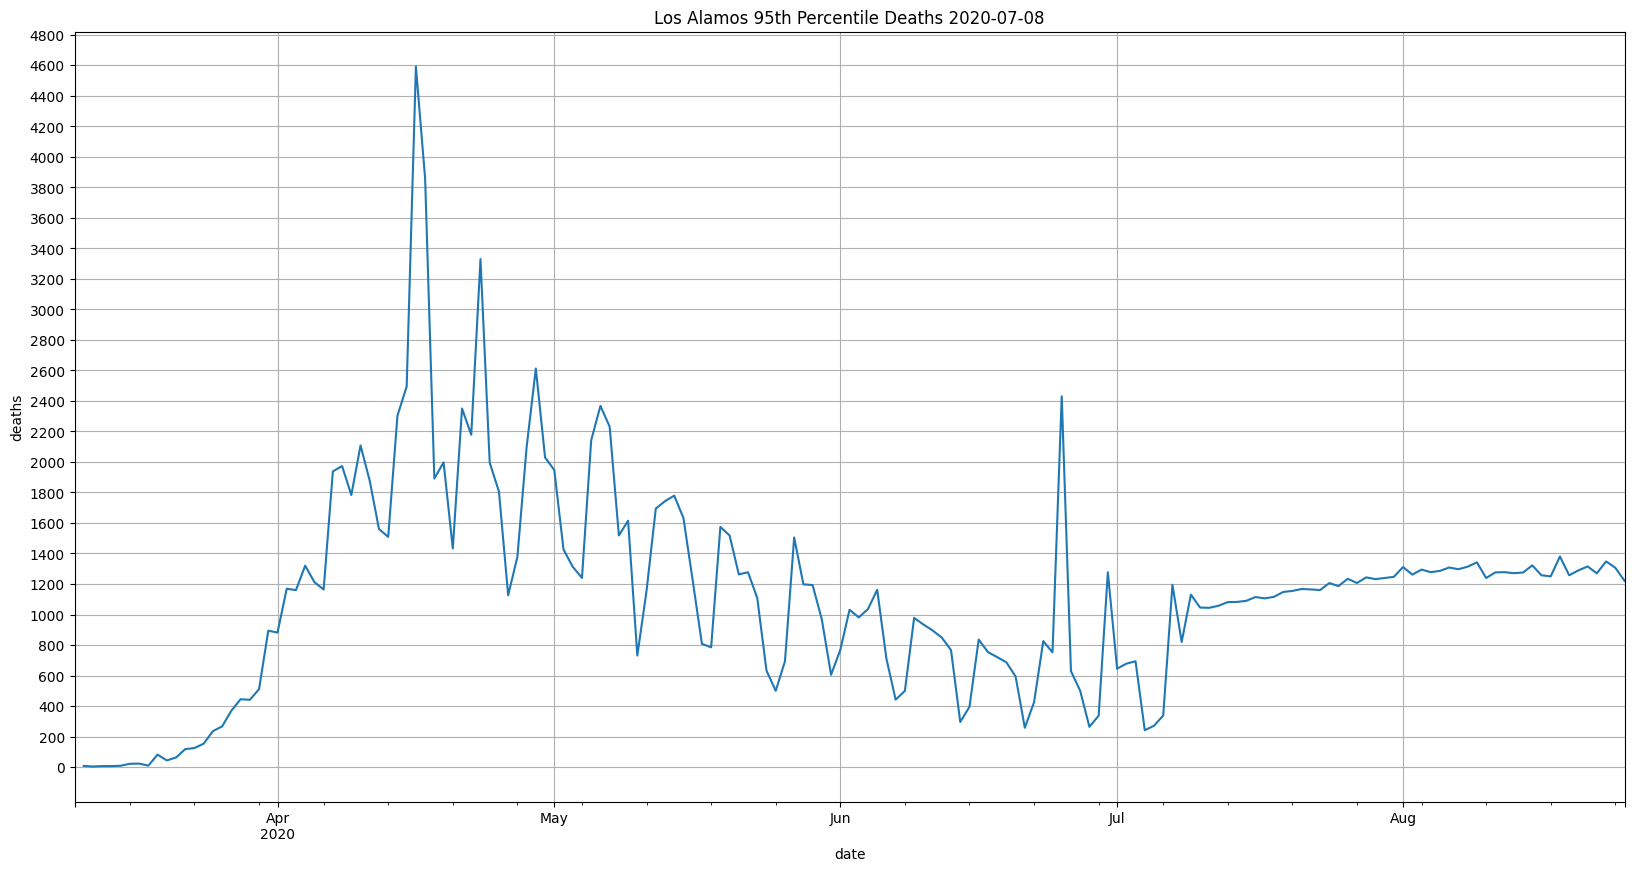

In [44]:
deaths_per_state = pd.pivot_table(death_quantiles_07_08, index='dates', values=['q.05', 'q.50', 'q.95'], columns='simple_state', aggfunc=np.sum)

ax = deaths_per_state[['q.95']].sum(axis=1).diff().plot(
    title="Los Alamos 95th Percentile Deaths 2020-07-08",
    figsize=(20,10),
    grid=True,
)

ax.yaxis.set_ticks(np.arange(0, 5000, 200))

ax.set_xlabel("date")
ax.set_ylabel("deaths")

deaths_per_state['q.95'][-2:]

plt.savefig("los-alamos-p95-2020-07-08.png")